# T1.1: MNIST

ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import optimizers
from keras import backend as K
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras import Loss

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import os

2024-11-10 14:37:36.390912: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-10 14:37:36.438394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 14:37:36.446706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 14:37:36.449103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 14:37:36.455437: I tensorflow/core/platform/cpu_feature_guar

## mnist_cnn.py

In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

## mnist_mlp.py


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731169074.124477 2985350 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731169074.163651 2985350 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731169074.163743 2985350 cud

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1731169074.995159 2985534 service.cc:146] XLA service 0x7f2594008590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731169074.995178 2985534 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-09 17:17:55.008761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-09 17:17:55.051495: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-09 17:17:55.121858: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [25]:
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser(learning_rate=learnRate),
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

In [ ]:
results = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate= 0.001,
                       hiddenLayers=1,
                       optimiser=optimizers.Adam,
                       outputActivation="softplus",
                       hiddenActivation="tanh",
                       epochs=30)

print(results)

## (b) Convolutional Neural Network

In [2]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(128, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(256, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  #CNNModel.add(Dense(640, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Layer Width: {layerWidth}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

In [ ]:
results = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate=0.001,
                       hiddenLayers=2,
                       optimiser=optimizers.Adamax,
                       outputActivation="elu",
                       hiddenActivation="sigmoid",
                       convActivation="relu",
                       epochs=30)

print(results)

In [4]:
class circularLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.abs(tf.atan2(tf.sin(y_true - y_pred), tf.cos(y_true - y_pred))))

In [3]:
def eval(model, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=False,
         learnRate=0.01,
        hiddenLayers=6,
        layerWidth=256,
        outputActivation="elu",
        hiddenActivation="elu",
        convActivation="relu",
        epochs=200,
        optimiser=keras.optimizers.Adagrad,
        inputShape=(75, 75, 1),
        outputShape=720,
        lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
    
    # LearnRate
    bestLearnRate = (0.01, 0, 0)
    #for learnRate in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate)

    #    if val_acc > bestLearnRate[2]:
    #        bestLearnRate = (learnRate, test_acc, val_acc)

    #    elif val_acc < bestLearnRate[2] - 0.1:
    #        break


    #bestLoss = (circularLoss, 0, 0)
    #for loss in [circularLoss,
    #                keras.losses.MeanSquaredError,
    #                keras.losses.MeanAbsoluteError,
    #                keras.losses.MeanSquaredLogarithmicError,
    #                keras.losses.MeanAbsolutePercentageError,
    #                keras.losses.CosineSimilarity,
    #                keras.losses.Huber,
    #                keras.losses.LogCosh,
    #                keras.losses.Tversky,
    #                keras.losses.Dice]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=loss,
    #                              learnRate=bestLearnRate[0],
    #                            epochs=100)

    #    if val_acc > bestLoss[2]:
    #        bestLoss = (loss, test_acc, val_acc)

    
    # Epochs
    bestEpochs = (150, 0, 0)
    #for epochs in range(25, 250, 25):
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=epochs,
    #                              optimiser=optimiser)

    #    if val_acc > bestEpochs[2]:
    #       bestEpochs = (epochs, test_acc, val_acc)

    #    else:
    #        break

        #elif val_acc < bestEpochs[2] - 0.1:
        #    break


    # Optimiser
    bestOptimiser = (keras.optimizers.Adagrad, 0, 0)
    #for optimiser in [keras.optimizers.SGD,
    #                keras.optimizers.RMSprop,
    #                keras.optimizers.Adam,
    #                keras.optimizers.AdamW,
    #                keras.optimizers.Adadelta,
    #                keras.optimizers.Adagrad,
    #                keras.optimizers.Adamax,
    #                keras.optimizers.Adafactor,
    #                keras.optimizers.Nadam,
    #                keras.optimizers.Ftrl,
    #                keras.optimizers.Lion]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=optimiser)

    #    if val_acc > bestOptimiser[2]:
    #        bestOptimiser = (optimiser, test_acc, val_acc)


    # Output activation function
    bestOutActivation = ("selu", 0, 0)
    #for outputActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                "tanh", "selu", "elu", "exponential"]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=bestOptimiser[0])

    #    if val_acc > bestOutActivation[2]:
    #        bestOutActivation = (outputActivation, test_acc, val_acc)


    # Hidden Layer activation function
    bestHiddenActivation = ("softsign", 0, 0)
    #for hiddenActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                "tanh", "selu", "elu", "exponential"]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=bestOutActivation[0],
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=bestOptimiser[0])

    #    if val_acc > bestHiddenActivation[2]:
    #        bestHiddenActivation = (hiddenActivation, test_acc, val_acc)

    
    # Convolutional layer Activation Function
    bestConvActivation = ("relu", 0, 0)
    #if CNN:
    #    for convActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                    "tanh", "selu", "elu", "exponential"]:
    #        test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                                         inputShape=inputShape, outputShape=outputShape,
    #                                         lossFunction=lossFunction,
    #                                        learnRate=learnRate,
    #                                        hiddenLayers=hiddenLayers,
    #                                        layerWidth=layerWidth,
    #                                        outputActivation=bestOutActivation[0],
    #                                        hiddenActivation=bestHiddenActivation[0],
    #                                        convActivation=convActivation,
    #                                        epochs=bestEpochs[0],
    #                                        optimiser=bestOptimiser[0])

    #        if val_acc > bestConvActivation[2]:
    #            bestConvActivation = (convActivation, test_acc, val_acc)

    
    # Hidden Layers
    bestHidden = (6, 0, 0)
    #for hiddenLayers in range(1, 50):
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                            lossFunction=lossFunction,
    #                            learnRate=learnRate,
    #                            hiddenLayers=hiddenLayers,
    #                            layerWidth=layerWidth,
    #                            outputActivation=bestOutActivation[0],
    #                            hiddenActivation=bestHiddenActivation[0],
    #                            convActivation=bestConvActivation[0],
    #                            epochs=bestEpochs[0],
    #                            optimiser=bestOptimiser[0])

    #    if val_acc > bestHidden[2]:
    #        bestHidden = (hiddenLayers, test_acc, val_acc)

    #    elif val_acc < bestHidden[2] - 0.1:
    #        break

    
    # Hidden Layers
    bestWidth = (352, 0, 0)
    accuracyList = []
    for layerWidth in range(344, 360, 2):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                lossFunction=lossFunction,
                                learnRate=learnRate,
                                hiddenLayers=bestHidden[0],
                                layerWidth=layerWidth,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=bestHiddenActivation[0],
                                convActivation=bestConvActivation[0],
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])
    
        accuracyList.append(val_acc)

        if val_acc > bestWidth[2]:
            bestWidth = (layerWidth, test_acc, val_acc)

        #elif val_acc < bestWidth[2] - 0.1:
        #    break


    # Regularisations
    bestAlpha = (0, 0, 0)
    #alphas = np.logspace(-10, -2, 200)
    #for alpha in alphas:
    #  test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                          hiddenLayers=bestHidden[0],
    #                          outputActivation=bestOutActivation[0],
    #                          hiddenActivation=bestHiddenActivation[0],
    #                          epochs=bestEpochs[0],
    #                          optimiser=bestOptimiser[0],
    #                          alpha=alpha)

    #  if accuracy > bestAlpha[2]:
    #   bestAlpha = (alpha, accuracy)

    print(f"Best Learning Rate: {bestLearnRate[0]}")
    print(f"Best Hidden layers: {bestHidden[0]}")
    print(f"Best Width: {bestWidth[0]}")
    print(f"Best Optimiser: {bestOptimiser[0]}")
    print(f"Best Output Activation: {bestOutActivation[0]}")
    print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
    print(f"Best Conv Activation: {bestConvActivation[0]}")
    print(f"Best Epochs: {bestEpochs[0]}")
    print(f"Final Val accuracy: {bestHidden[2]}")
    print(f"Final Test accuracy: {bestHidden[1]}")

    plt.figure()
    plt.plot(accuracyList, range(len(accuracyList)))
    plt.show()

    return {"bestHidden": bestHidden[0], "bestOptimiser": bestOptimiser[0],
            "bestOutActivation": bestOutActivation[0],
            "bestHiddenActivation": bestOutActivation[0],
            "bestEpochs": bestEpochs[0]}

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
bestSettings = eval(MLPModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest)
print(bestSettings)

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [ ]:
# CNN model eval
bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True)
print(bestSettings)

### CIFAR-10

In [ ]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

In [ ]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                            learnRate=0.001,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser=keras.optimizers.Adamax,
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

24 Classes

In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.001,
                                hiddenLayers=2,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=30,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=24)

print(test_acc, val_acc)

720 Classes

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731245889.808711  131710 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731245889.847352  131710 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731245889.8474

Epoch 1/150


I0000 00:00:1731245891.045273  131847 service.cc:146] XLA service 0x7f45b8020590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731245891.045296  131847 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-10 14:38:11.058738: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 14:38:11.129251: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-10 14:38:12.553497: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 51/450 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 6.5805

I0000 00:00:1731245892.814983  131847 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 6.7187e-04 - loss: 6.5821 - val_accuracy: 0.0000e+00 - val_loss: 6.5862
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 7.4444e-04 - loss: 6.5803 - val_accuracy: 0.0011 - val_loss: 6.5892
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0013 - loss: 6.5786 - val_accuracy: 5.5556e-04 - val_loss: 6.5910
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.7205e-04 - loss: 6.5790 - val_accuracy: 0.0000e+00 - val_loss: 6.5938
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 9.3072e-04 - loss: 6.5780 - val_accuracy: 0.0000e+00 - val_loss: 6.5958
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0015 - loss: 6.5778 - val_accuracy: 0.0000e+00 - val_loss: 6.5969
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5779 - val_accuracy: 0.0000e+00 - val_loss: 6.5985
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.08

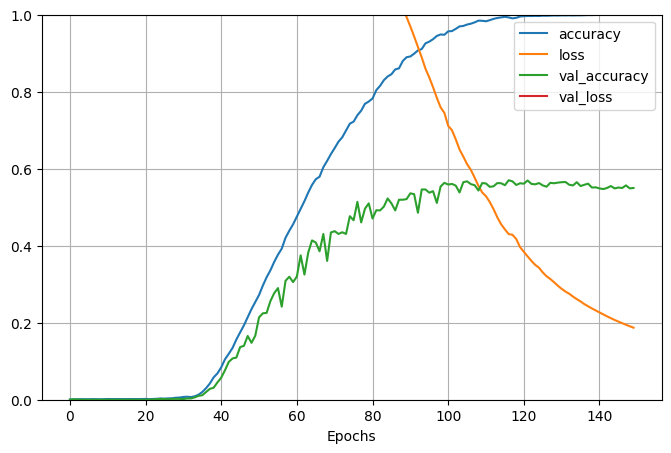

57/57 - 0s - 935us/step - accuracy: 0.5500 - loss: 1.4577
57/57 - 0s - 940us/step - accuracy: 0.5422 - loss: 1.4209
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 344
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.4576823711395264
Validation accuracy: 0.550000011920929
Test loss: 1.4209457635879517
Test accuracy: 0.5422222018241882


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 6.5496e-04 - loss: 6.5819 - val_accuracy: 0.0011 - val_loss: 6.5859
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5805 - val_accuracy: 0.0000e+00 - val_loss: 6.5880
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0013 - loss: 6.5789 - val_accuracy: 0.0011 - val_loss: 6.5910
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0012 - loss: 6.5785 - val_accuracy: 0.0000e+00 - val_loss: 6.5935
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0010 - loss: 6.5784 - val_accuracy: 0.0000e+00 - val_loss: 6.5944
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0020 - loss: 6.5783 - val_accuracy: 0.0000e+00 - val_loss: 6.5959
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.1534e-04 - loss: 6.5770 - val_accuracy: 0.0000e+00 - val_loss: 6.5977
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.00

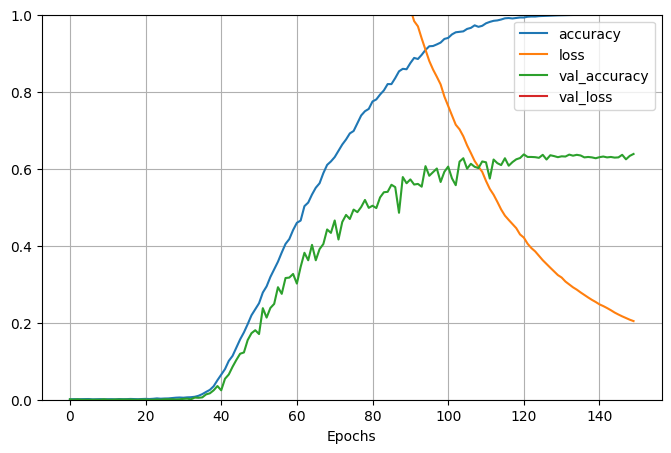

57/57 - 0s - 951us/step - accuracy: 0.6383 - loss: 1.1861
57/57 - 0s - 1ms/step - accuracy: 0.6417 - loss: 1.1522
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 346
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.1861469745635986
Validation accuracy: 0.6383333206176758
Test loss: 1.1522257328033447
Test accuracy: 0.6416666507720947


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0013 - loss: 6.5823 - val_accuracy: 5.5556e-04 - val_loss: 6.5854
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5811 - val_accuracy: 0.0000e+00 - val_loss: 6.5885
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0021 - loss: 6.5791 - val_accuracy: 0.0000e+00 - val_loss: 6.5911
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0011 - loss: 6.5789 - val_accuracy: 0.0000e+00 - val_loss: 6.5936
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0011 - loss: 6.5785 - val_accuracy: 0.0000e+00 - val_loss: 6.5954
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0026 - loss: 6.5779 - val_accuracy: 0.0000e+00 - val_loss: 6.5973
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5773 - val_accuracy: 0.0000e+00 - val_loss: 6.5990
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.00

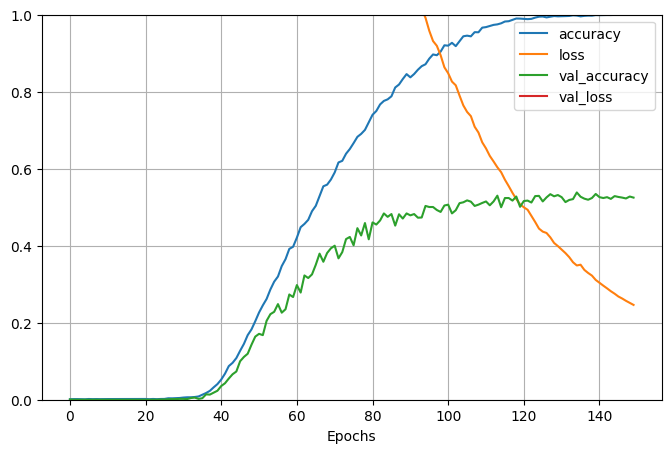

57/57 - 0s - 991us/step - accuracy: 0.5250 - loss: 1.4778
57/57 - 0s - 1ms/step - accuracy: 0.5106 - loss: 1.4870
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 348
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.4777756929397583
Validation accuracy: 0.5249999761581421
Test loss: 1.487004041671753
Test accuracy: 0.5105555653572083


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 8.7232e-04 - loss: 6.5819 - val_accuracy: 0.0000e+00 - val_loss: 6.5840
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 7.7775e-04 - loss: 6.5795 - val_accuracy: 0.0000e+00 - val_loss: 6.5879
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 9.1836e-04 - loss: 6.5794 - val_accuracy: 0.0000e+00 - val_loss: 6.5917
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.1949e-04 - loss: 6.5788 - val_accuracy: 0.0000e+00 - val_loss: 6.5936
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0013 - loss: 6.5781 - val_accuracy: 5.5556e-04 - val_loss: 6.5957
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0015 - loss: 6.5781 - val_accuracy: 0.0000e+00 - val_loss: 6.5974
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5775 - val_accuracy: 0.0000e+00 - val_loss: 6.5989
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

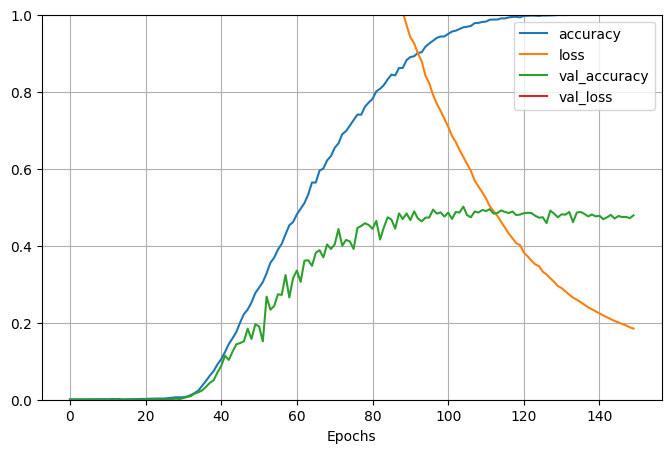

57/57 - 0s - 982us/step - accuracy: 0.4789 - loss: 1.7021
57/57 - 0s - 1ms/step - accuracy: 0.4839 - loss: 1.6401
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 350
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.7020665407180786
Validation accuracy: 0.4788888990879059
Test loss: 1.6400842666625977
Test accuracy: 0.4838888943195343


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 8.1737e-04 - loss: 6.5821 - val_accuracy: 0.0028 - val_loss: 6.5852
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.5912e-04 - loss: 6.5811 - val_accuracy: 5.5556e-04 - val_loss: 6.5880
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0022 - loss: 6.5790 - val_accuracy: 0.0028 - val_loss: 6.5894
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0012 - loss: 6.5785 - val_accuracy: 5.5556e-04 - val_loss: 6.5920
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5785 - val_accuracy: 0.0000e+00 - val_loss: 6.5940
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0018 - loss: 6.5780 - val_accuracy: 0.0000e+00 - val_loss: 6.5954
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0018 - loss: 6.5773 - val_accuracy: 0.0000e+00 - val_loss: 6.5971
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.00

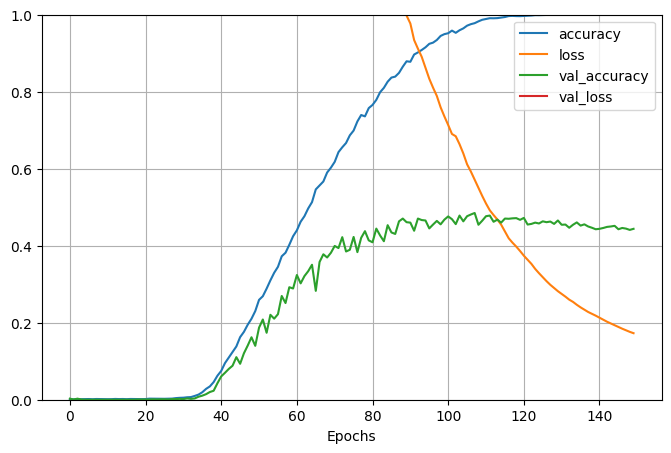

57/57 - 0s - 937us/step - accuracy: 0.4439 - loss: 1.8197
57/57 - 0s - 949us/step - accuracy: 0.4344 - loss: 1.8144
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 352
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.819719910621643
Validation accuracy: 0.44388890266418457
Test loss: 1.8143774271011353
Test accuracy: 0.43444445729255676


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0012 - loss: 6.5825 - val_accuracy: 0.0000e+00 - val_loss: 6.5854
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 6.0567e-04 - loss: 6.5803 - val_accuracy: 0.0000e+00 - val_loss: 6.5881
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5797 - val_accuracy: 0.0000e+00 - val_loss: 6.5906
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5786 - val_accuracy: 0.0000e+00 - val_loss: 6.5923
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0023 - loss: 6.5785 - val_accuracy: 0.0000e+00 - val_loss: 6.5944
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0026 - loss: 6.5776 - val_accuracy: 0.0000e+00 - val_loss: 6.5962
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0011 - loss: 6.5779 - val_accuracy: 5.5556e-04 - val_loss: 6.5987
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 

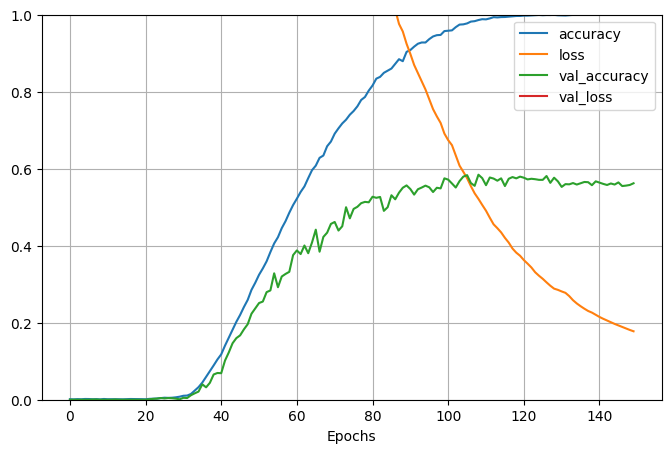

57/57 - 0s - 969us/step - accuracy: 0.5622 - loss: 1.4445
57/57 - 0s - 1ms/step - accuracy: 0.5500 - loss: 1.4150
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 354
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.4445152282714844
Validation accuracy: 0.5622222423553467
Test loss: 1.4150089025497437
Test accuracy: 0.550000011920929


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0013 - loss: 6.5817 - val_accuracy: 5.5556e-04 - val_loss: 6.5843
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0012 - loss: 6.5805 - val_accuracy: 0.0017 - val_loss: 6.5889
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0013 - loss: 6.5792 - val_accuracy: 0.0017 - val_loss: 6.5903
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5787 - val_accuracy: 5.5556e-04 - val_loss: 6.5930
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5776 - val_accuracy: 0.0017 - val_loss: 6.5944
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 7.5612e-04 - loss: 6.5779 - val_accuracy: 0.0000e+00 - val_loss: 6.5974
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5780 - val_accuracy: 0.0000e+00 - val_loss: 6.5982
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0025 - los

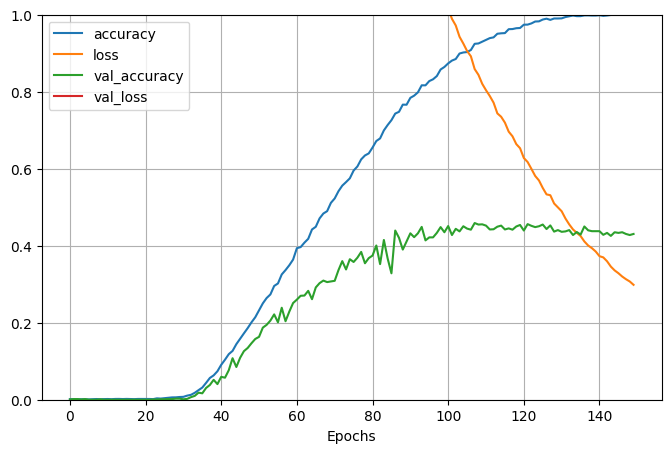

57/57 - 0s - 958us/step - accuracy: 0.4306 - loss: 1.7803
57/57 - 0s - 1ms/step - accuracy: 0.4417 - loss: 1.7491
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 356
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.780295729637146
Validation accuracy: 0.4305555522441864
Test loss: 1.7491029500961304
Test accuracy: 0.4416666626930237


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0011 - loss: 6.5821 - val_accuracy: 0.0033 - val_loss: 6.5853
Epoch 2/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5804 - val_accuracy: 5.5556e-04 - val_loss: 6.5881
Epoch 3/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5792 - val_accuracy: 0.0011 - val_loss: 6.5904
Epoch 4/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 9.1364e-04 - loss: 6.5787 - val_accuracy: 0.0000e+00 - val_loss: 6.5926
Epoch 5/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5779 - val_accuracy: 5.5556e-04 - val_loss: 6.5947
Epoch 6/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0013 - loss: 6.5780 - val_accuracy: 5.5556e-04 - val_loss: 6.5965
Epoch 7/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0017 - loss: 6.5774 - val_accuracy: 0.0000e+00 - val_loss: 6.5983
Epoch 8/150
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.8203e-

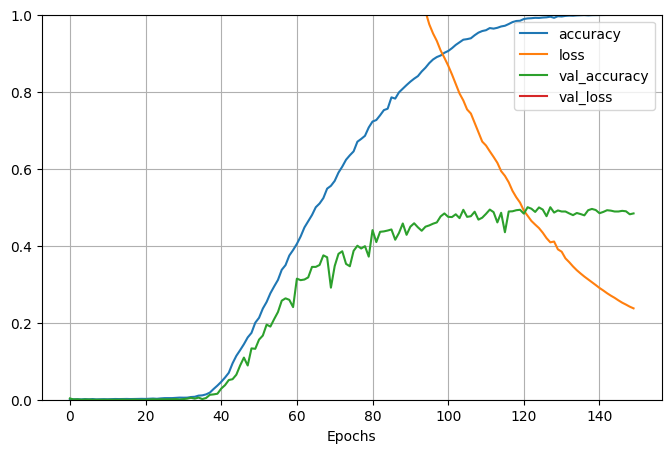

57/57 - 0s - 992us/step - accuracy: 0.4839 - loss: 1.6310
57/57 - 0s - 968us/step - accuracy: 0.4822 - loss: 1.6324
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 358
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 150
Validation loss: 1.6309654712677002
Validation accuracy: 0.4838888943195343
Test loss: 1.6323695182800293
Test accuracy: 0.48222222924232483
Best Learning Rate: 0.01
Best Hidden layers: 6
Best Width: 346
Best Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Best Output Activation: selu
Best Hidden Activation: softsign
Best Conv Activation: relu
Best Epochs: 150
Final Val accuracy: 0
Final Test accuracy: 0


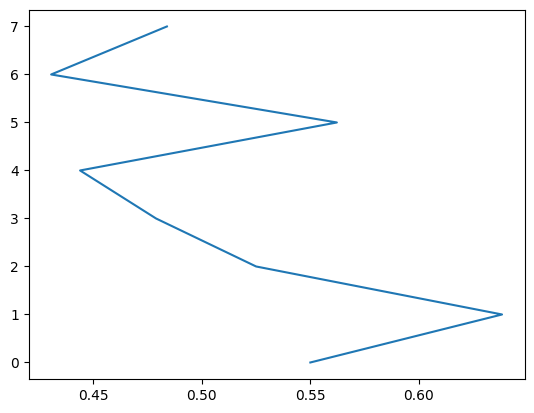

{'bestHidden': 6, 'bestOptimiser': <class 'keras.src.optimizers.adagrad.Adagrad'>, 'bestOutActivation': 'selu', 'bestHiddenActivation': 'selu', 'bestEpochs': 150}


In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                         learnRate=0.01,
                         hiddenLayers=6,
                         layerWidth=346,
                         outputActivation="selu",
                         hiddenActivation="softsign",
                         convActivation="relu",
                         epochs=200,
                         optimiser=keras.optimizers.Adagrad,
                         inputShape=(75, 75, 1),
                         outputShape=720)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          learnRate=0.01,
#                          hiddenLayers=6,
#                          layerWidth=512,
#                          outputActivation="elu",
#                          hiddenActivation="elu",
#                          convActivation="relu",
#                          epochs=200,
#                          optimiser=keras.optimizers.Adagrad,
#                          inputShape=(75, 75, 1),
#                          outputShape=720,
#                          lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

#print(bestSettings)

## (b) Regression

In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0
    
xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.01,
                                hiddenLayers=2,
                                layerWidth=4,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=200,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=1,
                                lossFunction=keras.losses.mean_absolute_error)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
#                    inputShape=(75, 75, 1), outputShape=1, lossFunction=circularLoss)
#print(bestSettings)